**You Wu**

#¿Quién hace ruido en Barcelona por la noche?

Barcelona es una ciudad turística, pero no siempre recibe los mejores turistas. El ruido por la noche es un problema recurrente (no siempre debido a los turistas obviamente). Dentro de los datos que recolecta la web de la ciutat al día del ayuntamiento de Barcelona está el número de personas que hay  diariamente en la ciudad desglosado en diferentes procedencias, tanto desde
municipios cercanos, provincias o países . Otra información que está disponible es el nivel de ruido en la ciudad (contaminación acústica) tomado a diferentes horas, el que nos interesa el de las 4 de la mañana. En este caso podemos averiguar si el que haya más personas de ciertos lugares en la ciudad tiene relación con el nivel de ruido que hay por la noche.

In [1]:
!pip install --user --upgrade apafib --quiet
!pip install scikit_optimize --quiet
!pip install sklearn --quiet
!pip install eli5 --quiet

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  mean_squared_error, make_scorer
# ConfusionMatrixDisplay,\
#                   classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
#                     accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, \
#                     mean_squared_error, make_scorer, mean_absolute_error
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor , VotingRegressor 
import eli5
from eli5.sklearn import PermutationImportance

from skopt import BayesSearchCV

from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

# import warnings

In [3]:
def save_results(clf, X_test, y_test, nclf, df):
    df.loc[nclf,'mse'] = mean_squared_error(y_test,clf.predict(X_test))
    df.loc[nclf,'cv_score'] = np.mean(cross_val_score(clf,X_train,y_train, cv=cv, scoring='r2'))
    return df

results_df = pd.DataFrame()

In [4]:
from apafib import load_BCN_ruido

data = load_BCN_ruido()

##Apartado A
Primero de todo vamos a ver las características del conjunto de datos dado.


In [5]:
data.head()

,Visitants a Barcelona segons municipi d’origen / Badalona,Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat,Visitants a Barcelona segons municipi d’origen / Sabadell,Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet,Visitants a Barcelona segons municipi d’origen / Terrassa,Visitants a Barcelona segons país d’origen / Estats Units,Visitants a Barcelona segons país d’origen / França,Visitants a Barcelona segons país d’origen / Itàlia,Visitants a Barcelona segons país d’origen / Països Baixos,Visitants a Barcelona segons país d’origen / Regne Unit,Visitants a Barcelona segons província d’origen / Girona,Visitants a Barcelona segons província d’origen / Illes Balears,Visitants a Barcelona segons província d’origen / Lleida,Visitants a Barcelona segons província d’origen / Madrid,Visitants a Barcelona segons província d’origen / Tarragona,Contaminació acústica: Decibels / 4h
0,40999.0,77619.0,9223.0,37267.0,8862.0,409.0,10471.0,433.0,619.0,668.0,7549.0,2071.0,2771.0,6461.0,7489.0,48.13
1,56515.0,91817.0,11894.0,42309.0,10445.0,551.0,10897.0,591.0,648.0,858.0,8805.0,2493.0,3529.0,7545.0,7933.0,45.74
2,50135.0,85142.0,10405.0,39708.0,8891.0,472.0,8149.0,682.0,540.0,756.0,8613.0,2668.0,3225.0,7114.0,7640.0,46.91
3,73971.0,108752.0,18806.0,47866.0,17357.0,461.0,5437.0,554.0,517.0,787.0,12451.0,2823.0,4738.0,7021.0,13027.0,45.99
4,72851.0,110814.0,19057.0,48995.0,17257.0,428.0,4245.0,526.0,527.0,799.0,12371.0,2439.0,4565.0,6410.0,13016.0,46.99


In [6]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Visitants a Barcelona segons municipi d’origen / Badalona,365.0,69536.210959,18388.625442,8701.00,54047.00,69555.00,80253.00,106027.0
Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat,365.0,105363.821918,22132.227309,28682.00,87509.00,107152.00,118633.00,147522.0
Visitants a Barcelona segons municipi d’origen / Sabadell,365.0,19719.978082,6100.520434,1688.00,15520.00,19545.00,23560.00,33615.0
Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet,365.0,44862.865753,9566.629846,14772.00,38039.00,45776.00,51477.00,62202.0
Visitants a Barcelona segons municipi d’origen / Terrassa,365.0,17725.879452,5453.135028,1399.00,13743.00,17789.00,20880.00,29528.0
Visitants a Barcelona segons país d’origen / Estats Units,365.0,5022.506849,4290.159936,250.00,739.00,5960.00,8091.00,16230.0
Visitants a Barcelona segons país d’origen / França,365.0,20247.032877,14724.095147,1004.00,8149.00,16384.00,27620.00,59425.0
Visitants a Barcelona segons país d’origen / Itàlia,365.0,4989.780822,3883.215776,281.00,1577.00,4378.00,7679.00,16597.0
Visitants a Barcelona segons país d’origen / Països Baixos,365.0,2834.279452,2748.928129,143.00,1088.00,1758.00,3286.00,15286.0
Visitants a Barcelona segons país d’origen / Regne Unit,365.0,2775.876712,2402.149111,65.00,708.00,1534.00,4772.00,9046.0


Para estudiar mejor las tres columnas de las empresas vamos analizar-las de manera separada. 

####Variables numéricas por municipio

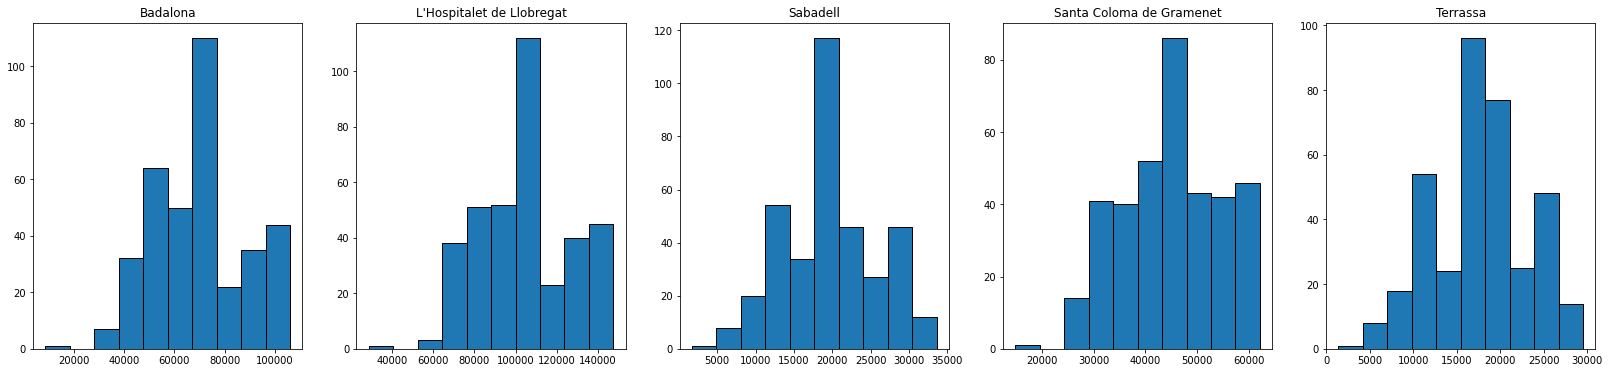

In [7]:
ig,ax = plt.subplots(1,5,figsize=(28,6))
ax[0].hist(data["Visitants a Barcelona segons municipi d’origen / Badalona"],  edgecolor='black');
ax[0].set_title('Badalona');
ax[1].hist(data["Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat"],  edgecolor='black');
ax[1].set_title("L'Hospitalet de Llobregat");
ax[2].hist(data["Visitants a Barcelona segons municipi d’origen / Sabadell"],  edgecolor='black');
ax[2].set_title('Sabadell');
ax[3].hist(data["Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet"],  edgecolor='black');
ax[3].set_title('Santa Coloma de Gramenet');
ax[4].hist(data["Visitants a Barcelona segons municipi d’origen / Terrassa"],  edgecolor='black');
ax[4].set_title('Terrassa');



En las histogramas que se muestra podemos ver que l'Hospital de Llobregat es el municipio en lo cual hay más visitantes a Barcelona, donde más de 100 días superan de 100000 vistantes.

####Variables numéricas por país

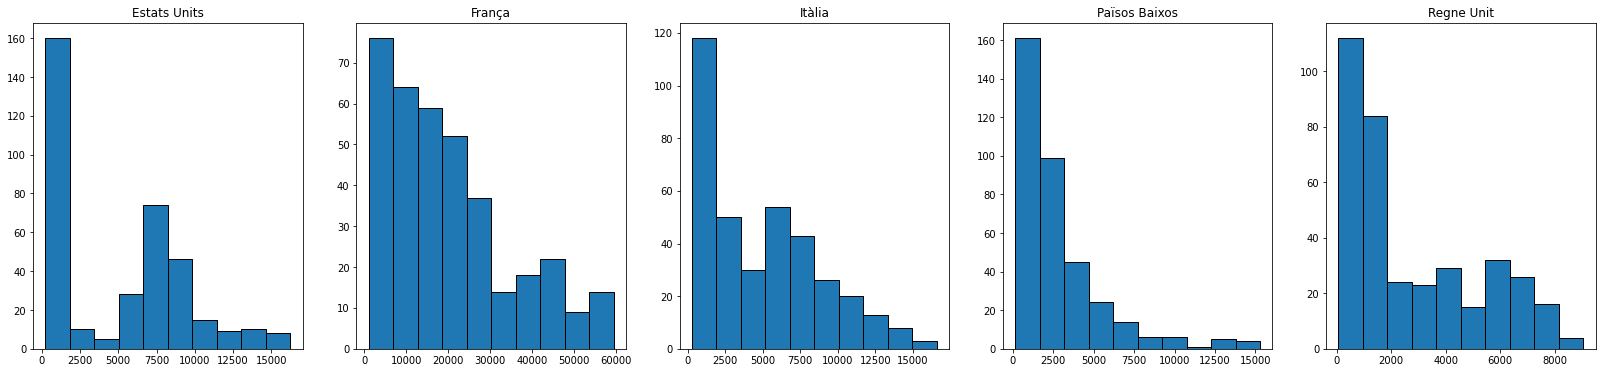

In [8]:
ig,ax = plt.subplots(1,5,figsize=(28,6))
ax[0].hist(data["Visitants a Barcelona segons país d’origen / Estats Units"],  edgecolor='black');
ax[0].set_title('Estats Units');
ax[1].hist(data["Visitants a Barcelona segons país d’origen / França"],  edgecolor='black');
ax[1].set_title("França");
ax[2].hist(data["Visitants a Barcelona segons país d’origen / Itàlia"],  edgecolor='black');
ax[2].set_title('Itàlia');
ax[3].hist(data["Visitants a Barcelona segons país d’origen / Països Baixos"],  edgecolor='black');
ax[3].set_title('Països Baixos');
ax[4].hist(data["Visitants a Barcelona segons país d’origen / Regne Unit"],  edgecolor='black');
ax[4].set_title('Regne Unit');



Vistantes segundo el país podemos observar que mayoría de los días se mantiene menos de 2500 visitantes, excepto Francia.

####Variables numéricas por província

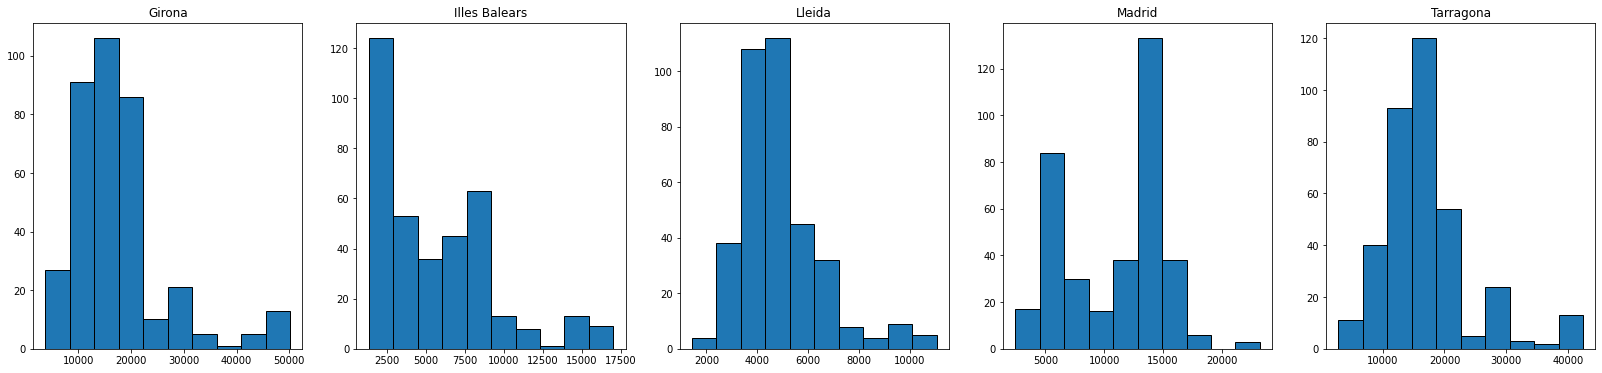

In [9]:
ig,ax = plt.subplots(1,5,figsize=(28,6))
ax[0].hist(data['Visitants a Barcelona segons província d’origen / Girona'],  edgecolor='black');
ax[0].set_title('Girona');
ax[1].hist(data['Visitants a Barcelona segons província d’origen / Illes Balears'],  edgecolor='black');
ax[1].set_title("Illes Balears");
ax[2].hist(data["Visitants a Barcelona segons província d’origen / Lleida"],  edgecolor='black');
ax[2].set_title('Lleida');
ax[3].hist(data["Visitants a Barcelona segons província d’origen / Madrid"],  edgecolor='black');
ax[3].set_title('Madrid');
ax[4].hist(data["Visitants a Barcelona segons província d’origen / Tarragona"],  edgecolor='black');
ax[4].set_title('Tarragona');



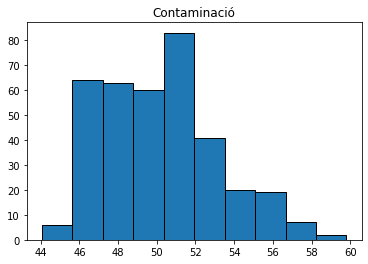

In [10]:
plt.hist(data['Contaminació acústica: Decibels / 4h'],  edgecolor='black');
plt.title('Contaminació');

Podemos observar que más de 80 días la contaminació acústica a Barcelona esta entre 50 y 52 Decibeles.

Examinamos el número de valores NAs para cada variables, obtenimos el resultado en el que todos ellos estan asignados a un valor. 

In [11]:
data.isna().sum()

Visitants a Barcelona segons municipi d’origen / Badalona                     0
Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat    0
Visitants a Barcelona segons municipi d’origen / Sabadell                     0
Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet     0
Visitants a Barcelona segons municipi d’origen / Terrassa                     0
Visitants a Barcelona segons país d’origen / Estats Units                     0
Visitants a Barcelona segons país d’origen / França                           0
Visitants a Barcelona segons país d’origen / Itàlia                           0
Visitants a Barcelona segons país d’origen / Països Baixos                    0
Visitants a Barcelona segons país d’origen / Regne Unit                       0
Visitants a Barcelona segons província d’origen / Girona                      0
Visitants a Barcelona segons província d’origen / Illes Balears               0
Visitants a Barcelona segons província d

No hay ningún atributo con valor nulos

A continuación vamos representar de distintas formas la correlación de los datos

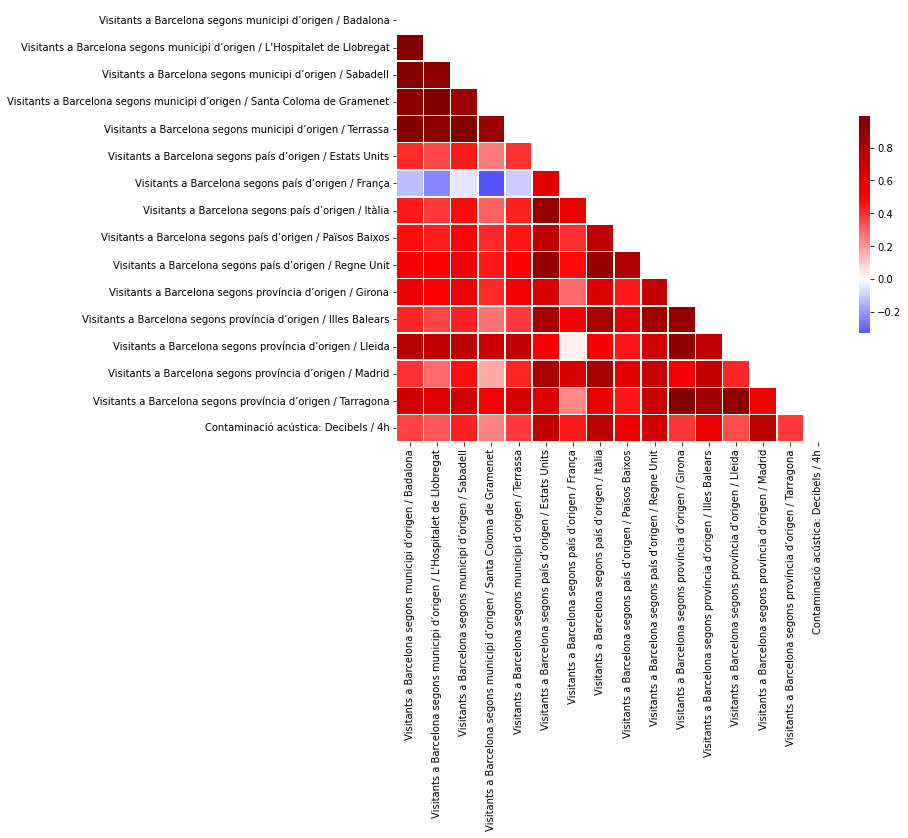

In [12]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

En la matriz de correlaciones entre todas las variables del conjunto de datos podemos observar que existe correlaciones en la mayoría de los atributos. Las correlaciones más importante són entre los visitantes a Barcelona segundo el municipio, en el que todos ellos la correlación supera el 0.8.

### Partición de datos

Dividimos los datos en entrenamiento (80%) y test (20%), en este caso como que no hay atributos no significativo o no utilizados, no vamos eliminar ningunos de ellos, pero para facilitar las consultas de las variables vamos a renombras todas ellas.

In [13]:
from sklearn.model_selection import train_test_split

data.columns = ['Municipi:Badalona', "Municipi:L'Hospitalet de Llobregat", 'Municipi:Sabadell','Municipi:Santa Coloma de Gramenet', 'Municipi:Terrassa',
                      'País:Estats Units', 'País:França','País:Itàlia', 'País:Països Baixos', 'País:Regne Unit',
                      'Província:Girona', 'Província:Illes Balears', 'Província:Lleida', 'Província:Madrid', 'Província:Tarragona', 'Contaminació']

X = data.loc[:, data.columns != 'Contaminació']
y = data['Contaminació']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(292, 15) (292,)
(73, 15) (73,)


El siguiente y último paso para dejar los conjuntos de datos listos para el ajuste de los distintos modelos, es la normalización de los datos utilizando MinMaxScaler.

In [14]:
scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

#Apartado B
En este apartado vamos a utilizar dos modelos distions de regressión

##K-nn
Primer de todo vamos a utilizar el modelo de K-nearest neighbours, K-nn funciona a partir de la recuperación de los vecinos más cercanos a partir de su distancia. 

Primer paso es la explorar los hiperparámetros de K-nn,  basicamente cuantos vecinos usamos para hacer la predicción para obtener las mejores resultados.

In [15]:
knn =  KNeighborsRegressor()
print(np.mean(cross_val_score(knn,X_train_s,y_train,cv=10)))

0.6851715506359142


In [16]:
cv = 5
param = {'n_neighbors':[1, 3, 5, 7, 11, 15], 
          'weights':['distance', 'uniform'], 
          'leaf_size':[1, 5, 10, 20, 30],
          'metric': ['l2', 'l1', 'cosine']}

knn_gs =  GridSearchCV(knn,param,cv=cv, n_jobs=-1)
knn_gs.fit(X_train_s, y_train);

In [17]:
show_html(pd.DataFrame(knn_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
158,"{'leaf_size': 30, 'metric': 'l1', 'n_neighbors': 3, 'weights': 'distance'}",0.749322,1
159,"{'leaf_size': 30, 'metric': 'l1', 'n_neighbors': 3, 'weights': 'uniform'}",0.748945,2
122,"{'leaf_size': 20, 'metric': 'l1', 'n_neighbors': 3, 'weights': 'distance'}",0.748397,3
123,"{'leaf_size': 20, 'metric': 'l1', 'n_neighbors': 3, 'weights': 'uniform'}",0.748082,4
86,"{'leaf_size': 10, 'metric': 'l1', 'n_neighbors': 3, 'weights': 'distance'}",0.747785,5


Puede haber varios valores de hiperparametros que obtengan el mismo resultado, en ese caso elegiriamos cualquiera de entre ellos.

En este caso podemos ver como usando l1 como metric, leaf_size igual a 30 y escogiendo 3 vecinos, obtenemos los mejores resultados (acierto del 74,9%).



In [18]:
results_df = save_results(knn_gs, X_test_s, y_test, 'K-NN', results_df)

Usando el método de permutation importance sobre el test sobre el modelo con el mejor resulatados obtenemos la siguiente tabla.

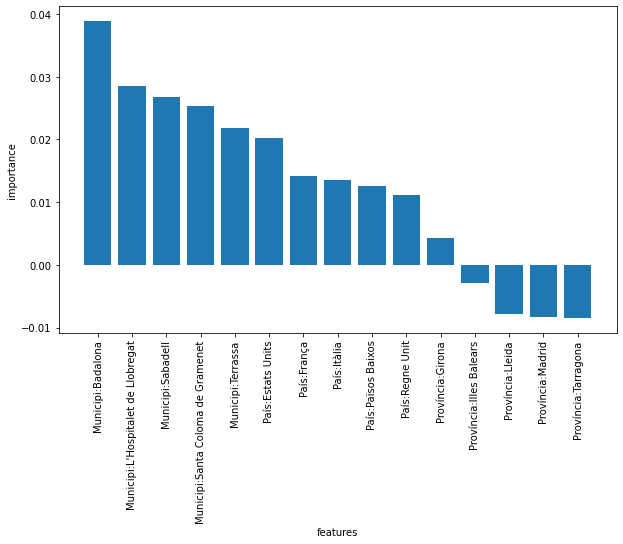

In [19]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_gs, X_test_s, y_test, n_repeats=10, random_state=1, n_jobs=-1)

feature_names = X_test.columns
importances = np.sort(result['importances_mean'])[::-1]

plt.figure(figsize=(10,6));
plt.bar(feature_names, importances);
plt.xlabel('features');
plt.ylabel('importance');
plt.xticks(rotation=90);
plt.show();

En el modelo Knn observamos los visitantes que afecta más la contaminación acústica a Barcelona són del origen Badalona en la cual tiene un peso alredor de 0.038. Seguidamente viene los visitantes de los los municipios: L'Hospitalet de Llobregat, Sabadell y Santa Coloma de Gramenet.  

##SVM
A continuación aplicaremos el modelo SVM de regressión con kernel RBF

In [20]:
cv=5
param = {'C':10**np.linspace(-3,3,101), 'gamma':['scale','auto'], 'epsilon':np.linspace(0,0.01,11)}
rbsvr =  SVR(kernel='rbf', max_iter=25000, cache_size=2000)
rbsvr_gs = GridSearchCV(rbsvr,param, 
                        cv=cv, 
                        scoring=make_scorer(mean_squared_error, greater_is_better=False),
                        n_jobs=-1)
rbsvr_gs.fit(X_train_s, y_train);

In [21]:
show_html(pd.DataFrame(rbsvr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
1824,"{'C': 83.17637711026708, 'epsilon': 0.01, 'gamma': 'scale'}",-2.254816,1
1822,"{'C': 83.17637711026708, 'epsilon': 0.009000000000000001, 'gamma': 'scale'}",-2.255293,2
1820,"{'C': 83.17637711026708, 'epsilon': 0.008, 'gamma': 'scale'}",-2.255961,3
1818,"{'C': 83.17637711026708, 'epsilon': 0.007, 'gamma': 'scale'}",-2.256479,4
1816,"{'C': 83.17637711026708, 'epsilon': 0.006, 'gamma': 'scale'}",-2.257007,5


Puede haber varios valores de hiperparametros que obtengan el mismo resultado, en ese caso elegiriamos cualquiera de entre ellos. 

En este caso podemos ver usando C aproximadamente de 27.542, un epsilon de 0.0 y gamma scale otenemos los mejores resultados.

In [ ]:
results_df = save_results(rbsvr_gs, X_test_s, y_test, 'SVM', results_df)

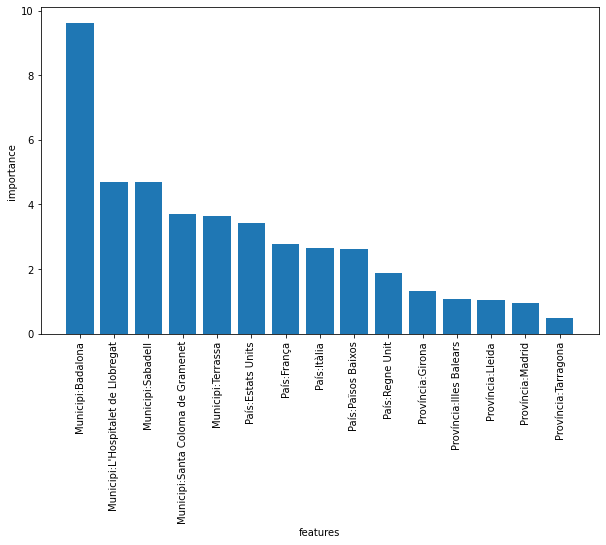

In [23]:
r = rbsvr_gs.best_estimator_
r.fit(X_train_s, y_train);

result = permutation_importance(rbsvr_gs, X_test_s, y_test, n_repeats=10, random_state=1, n_jobs=-1)

feature_names = X_test.columns
importances = np.sort(result['importances_mean'])[::-1]

plt.figure(figsize=(10,6));
plt.bar(feature_names, importances);
plt.xlabel('features');
plt.ylabel('importance');
plt.xticks(rotation=90);
plt.show();

En el modelo de suport vector de regresión, los visitantes del municipio Badalona tiene un peso muy importante respecto la variable a predecir,casi el doble del segundo atributo más importante, que son los visitantes del municipio L'Hospitalet de Llobregat, y seguidamento los atributos más importantes són el municipio Sabadell, Santa Coloma de Gramenet y Terrassa.

#Apartado C
En este apartado vamos a analiza mediante los árboles de decisiones

##Random Forest

Primer de todo utilizaremos el modelo Random Forest.

Primero exploraremos los hiperparámetros, para utilizar los que mejores resultados nos proporcionen. Una vez tengamos estos hiperparámetros, los aplicaremos a nuestro modelo y veremos que porcentaje de acierto obtenemos con el conjunto de test.

In [24]:
from sklearn.ensemble import RandomForestRegressor
cv = 5
param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10]}

rf =  RandomForestRegressor(random_state=1)
rf_gs =  GridSearchCV(rf,param, cv=cv, n_jobs=-1)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 5, 8, 9, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'n_estimators': [5, 10, 25, 40, 50, 75, 100, 200]})

In [25]:
show_html(pd.DataFrame(rf_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
286,"{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}",0.732195,1
294,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}",0.732079,2
284,"{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}",0.731912,3
242,"{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 25}",0.731766,4
243,"{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 40}",0.731687,5


Como podemos observar en la tabla anterior el mejor modelo obtenido tiene una precisión de 73,22%, con los siguientes hiperparámetros: max_depth de 10, min_sample_leaf de 1 y un n_estimators de 100.

In [26]:
results_df = save_results(rf_gs, X_test, y_test, 'RF', results_df)

In [27]:
perm = PermutationImportance(rf_gs, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.8996 ± 0.2914,País:Itàlia
0.0635 ± 0.0195,País:Països Baixos
0.0399 ± 0.0166,Província:Illes Balears
0.0349 ± 0.0150,Província:Lleida
0.0309 ± 0.0185,Província:Madrid
0.0299 ± 0.0507,País:Estats Units
0.0228 ± 0.0135,Província:Girona
0.0195 ± 0.0120,País:França
0.0092 ± 0.0186,Província:Tarragona
0.0060 ± 0.0189,Municipi:Santa Coloma de Gramenet


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


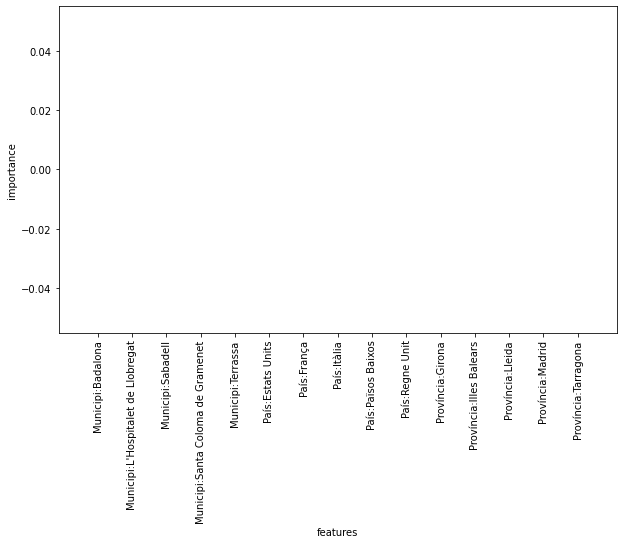

In [28]:
result = permutation_importance(rf_gs, X_test_s, y_test, n_repeats=10, random_state=1, n_jobs=-1)

feature_names = X_test.columns
importances = np.sort(result['importances_mean'])[::-1]

plt.figure(figsize=(10,6));
plt.bar(feature_names, importances);
plt.xlabel('features');
plt.ylabel('importance');
plt.xticks(rotation=90);
plt.show();

En este caso utilizando la función *PermutationImportance* observamos sólo los visitantes de origen país Italia tiene un peso importante sobre la contaminación acústica de la noche a Barcelona, en los cual tiene un peso de 0.8996.

##Gradient Boosting

En este apartado vamos a utilizar el modelo Gradient Boosting

Primero exploraremos los hiperparámetros, para utilizar los que mejores resultados nos proporcionen

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor , VotingRegressor 

gbr = GradientBoostingRegressor()

param = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 10),
    'learning_rate': (0.01, 1.0),
    'criterion':['friedman_mse', 'squared_error'],
    'loss': ['squared_error', 'absolute_error', 'huber']
}

gbr_gs = GridSearchCV(gbr, param)
gbr_gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': (0.01, 1.0),
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'max_depth': (1, 10), 'n_estimators': (10, 1000)})

In [ ]:
show_html(pd.DataFrame(gbr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
7,"{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 10, 'n_estimators': 1000}",0.743010,1
31,"{'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 10, 'n_estimators': 1000}",0.738121,2
9,"{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 1000}",0.661439,3
33,"{'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 1000}",0.661433,4
1,"{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'squared_error', 'max_depth': 1, 'n_estimators': 1000}",0.651137,5


Aplicaremos los hiperparámetros con mejor resultados 0.7413 de precisión a nuestro modelo y veremos que porcentaje de acierto obtenemos con el conjunto de test.

In [ ]:
perm = PermutationImportance(gbr_gs, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.3301 ± 0.1391,País:Itàlia
0.1462 ± 0.0786,País:Estats Units
0.0685 ± 0.0286,País:Països Baixos
0.0197 ± 0.0109,Municipi:L'Hospitalet de Llobregat
0.0180 ± 0.0195,País:França
0.0133 ± 0.0152,Província:Illes Balears
0.0127 ± 0.0139,Província:Girona
0.0127 ± 0.0376,Província:Madrid
0.0103 ± 0.0278,País:Regne Unit
0.0050 ± 0.0082,Província:Lleida


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


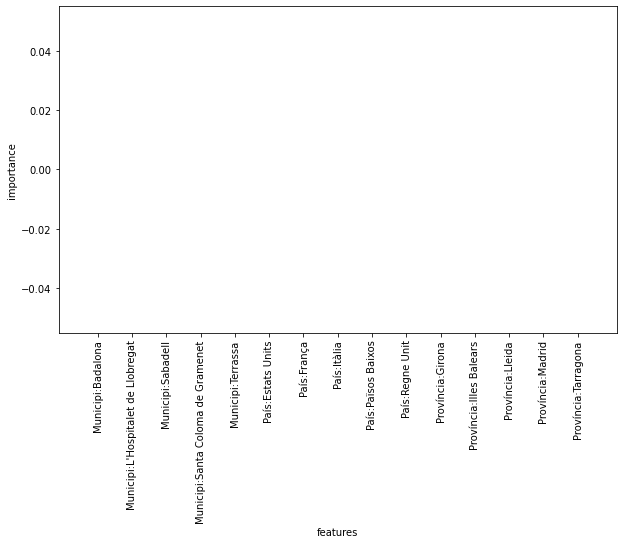

In [ ]:
result = permutation_importance(gbr_gs, X_test_s, y_test, n_repeats=10, random_state=1, n_jobs=-1)

feature_names = X_test.columns
importances = np.sort(result['importances_mean'])[::-1]

plt.figure(figsize=(10,6));
plt.bar(feature_names, importances);
plt.xlabel('features');
plt.ylabel('importance');
plt.xticks(rotation=90);
plt.show();

Una vez obtenido e mejor modelo utilizammos el método de *permutation importance* sobre el test para determinar qué atributos son más importantes en el model para predecir, los tres más importantes són los visitantes de origen Italia, Estados Unidos y Paisos bascos

In [ ]:
results_df = save_results(gbr_gs.best_estimator_, X_test, y_test, 'GB', results_df)

In [ ]:
results_df.sort_values(by=['mse'])

,mse,cv_score
SVM,2.111958,0.657487
K-NN,2.138486,0.745935
RF,2.711455,0.725573
GB,3.114823,0.738768


Podemos observar la tabla anterior los modelos con mejores resultados obtenidos, es decir con menos error cuadrático són el modelo SVM y K-NN.

#APARTADO D
Como hemos visto en teoría, cuando tenemos varios modelos podemos combinarlos usando diferentes estrategias. Vamos entrenar con StackedRegressor y VotingRegressor usando los dos mejores modelos que has encontrado en los apartados anteriores con sus mejores hiperparámetros.

##Stacking
Utilizando stacking, en este caso aprendemos a como combinar las decisiones de los regressores.

In [ ]:
st1 = StackingRegressor([('knn', knn_gs.best_estimator_),
                          ('svm', rbsvr_gs.best_estimator_)],
                          cv=cv, n_jobs=1)
print(np.mean(cross_val_score(st1,X_train,y_train,cv=cv)))                             
st1.fit(X_train, y_train);                          

0.7447647359067529


In [ ]:
results_df = save_results(st1, X_test, y_test, 'Stacking KNN+SVM', results_df)

In [ ]:
results_df.sort_values(by=['mse'])

,mse,cv_score
Stacking KNN+SVM,1.849565,0.744765
SVM,2.111958,0.657487
K-NN,2.138486,0.745935
RF,2.711455,0.725573
GB,3.114823,0.738768


Combinado el modelo de K-NN y el SVM utilizando el regressor de stacking obtenemos un promedio de error cuadrático de 1.849, donde ha habido un mejora significativo respeto los modelos por separado

In [ ]:
perm = PermutationImportance(st1, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [ ]:
result = permutation_importance(st1, X_test_s, y_test, n_repeats=10, random_state=1, n_jobs=-1)

feature_names = X_test.columns
importances = np.sort(result['importances_mean'])[::-1]

plt.figure(figsize=(10,6));
plt.bar(feature_names, importances);
plt.xlabel('features');
plt.ylabel('importance');
plt.xticks(rotation=90);
plt.show();

En la tabla anterior observamos que los visitantes de municipio L'Hospitalet de Llobregat tiene un peso importante sobre la variable al predecir, seguidamente són los de origen país Francia y los de municipio Badalona

##Voting
Finalmente hacemos un regresor que corresponda la votación entre dos mejores regresores que consistira en SVM regressor con K-nn regressor.



In [ ]:
vs1 = VotingRegressor([('knn', knn_gs.best_estimator_),
                        ('svm', rbsvr_gs.best_estimator_)], n_jobs=1)
print(np.mean(cross_val_score(vs1,X_train,y_train,cv=cv)))                             
vs1.fit(X_train, y_train);     

In [ ]:
results_df = save_results(vs1, X_test, y_test, 'Voting KNN+SVM', results_df)

In [ ]:
results_df.sort_values(by=['mse'])

También se obtiene mejor precisión comparando con el regressor SVM y regresssor K-NN por separado, un mse de 1.89 aproximadamente

In [ ]:
perm = PermutationImportance(vs1, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [ ]:
result = permutation_importance(vs1, X_test_s, y_test, n_repeats=10, random_state=1, n_jobs=-1)

feature_names = X_test.columns
importances = np.sort(result['importances_mean'])[::-1]

plt.figure(figsize=(10,6));
plt.bar(feature_names, importances);
plt.xlabel('features');
plt.ylabel('importance');
plt.xticks(rotation=90);
plt.show();

En la tabla anterior observamos que los visitantes de municipio L'Hospitalet de Llobregat tiene el peso importante sobre la variable al predecir igual que en stacking, seguidamente són los de origen de municipio Badalona y de país Francia.

In [ ]:
results_df.sort_values(by=['mse'])

Finalment observamos un peso importante sobre el atributo de los visitantes de origen país Italia en utilizar regressor de tipo árboles de decisión y para los modelos de combinación utilizando los mejores modelos obtenidos anteriormente, que en este caso son el de SVM y Knn observamos tanto utilizando Stacking como Voting en los dos, los tres más importantes són: los visitantes a Barcelona de origen municipio: L'Hospitales de Llobregat y Badalona, y de origen país Francia.